In [1]:
! pip3 install opencv-python

Image images/img1.jpeg score: 1


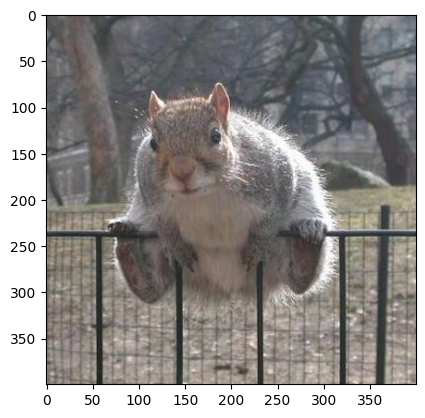

Image images/img2.jpeg score: 1


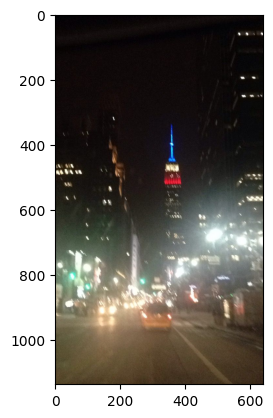

Image images/img8.jpeg score: 1


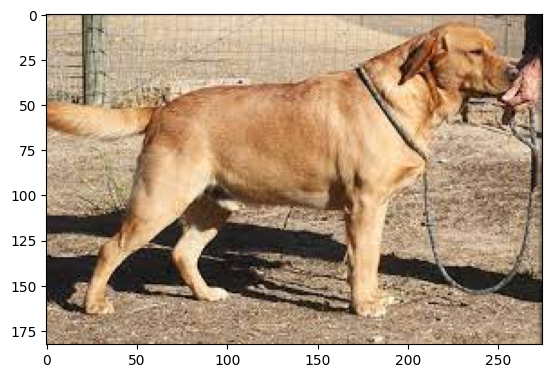

Image images/img16.jpeg score: 1


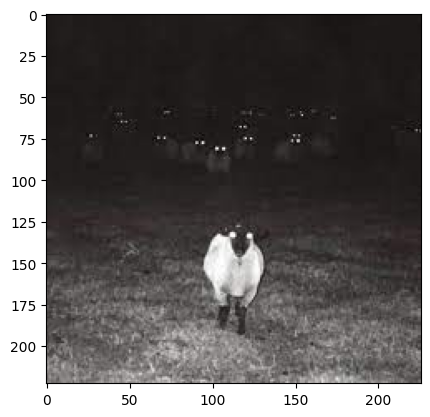

Image images/img17.jpeg score: 1


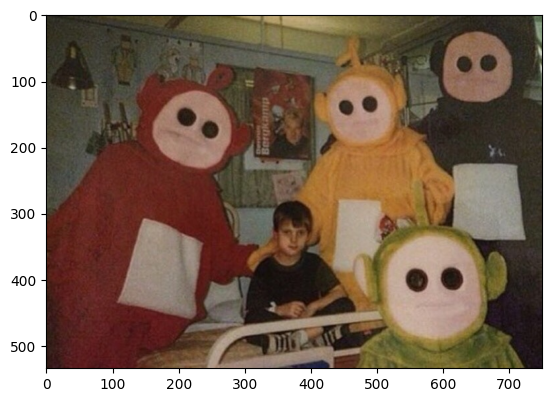

Image images/img0.jpeg score: 2


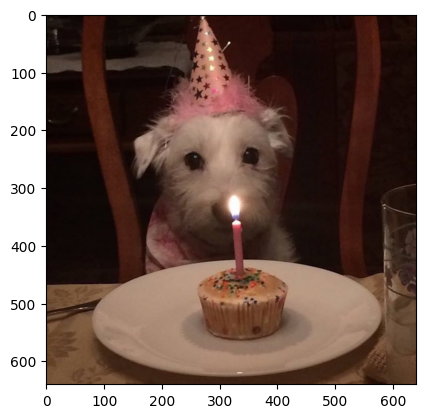

Image images/img13.jpeg score: 2


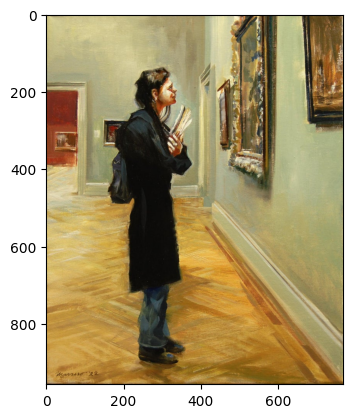

Image images/img19.jpeg score: 2


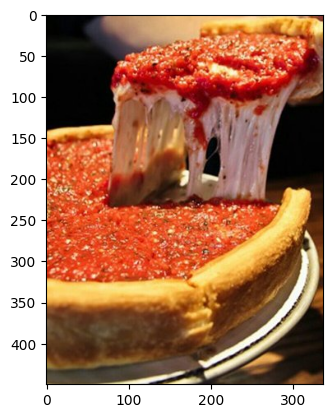

Image images/img6.jpeg score: 3


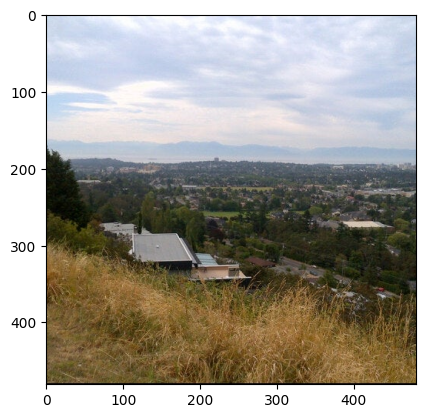

Image images/img10.jpeg score: 3


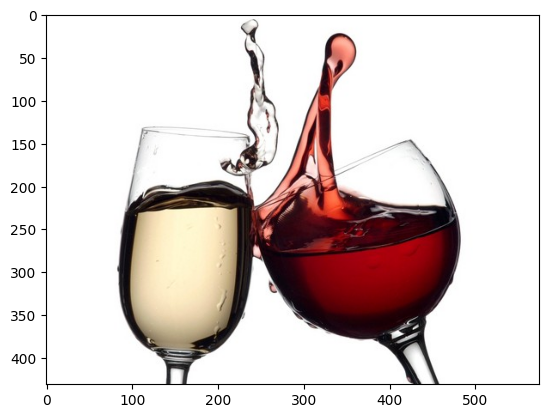

Image images/img3.jpeg score: 4


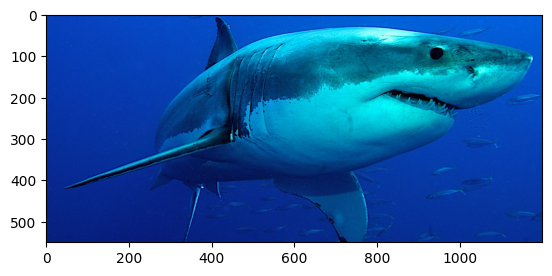

Image images/img5.jpeg score: 4


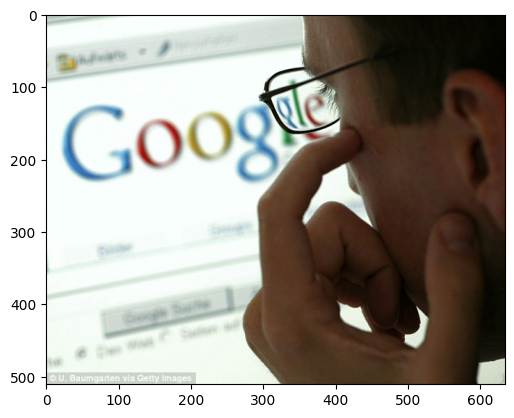

Image images/img9.jpeg score: 4


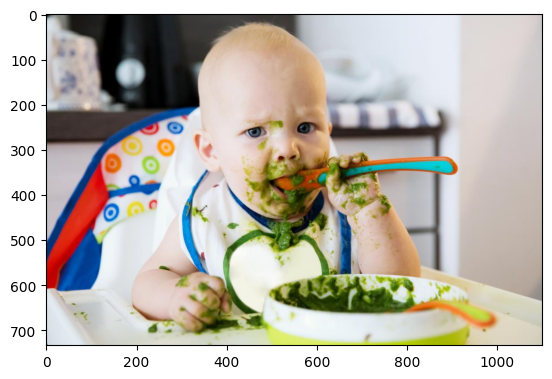

Image images/img11.jpeg score: 4


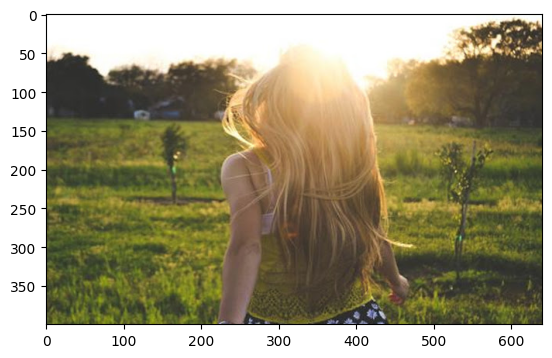

Image images/img14.jpeg score: 4


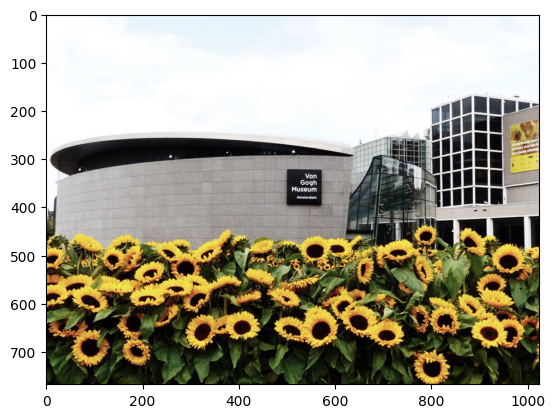

Image images/img18.jpeg score: 4


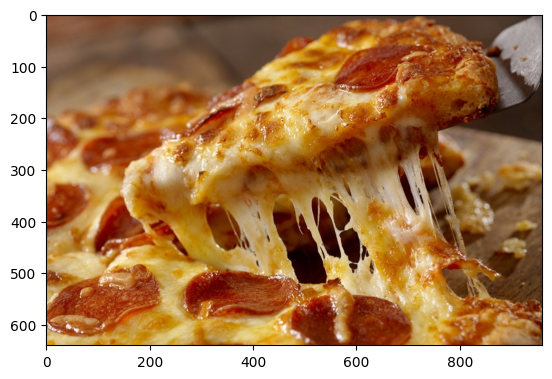

Image images/img4.jpeg score: 5


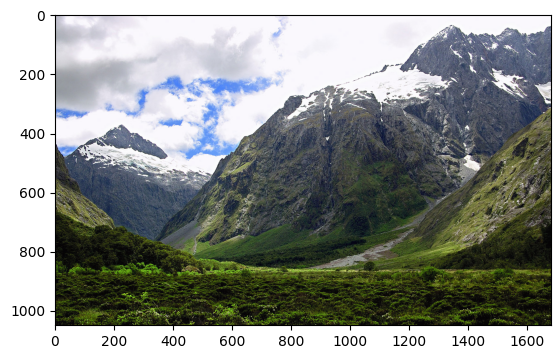

Image images/img7.jpeg score: 5


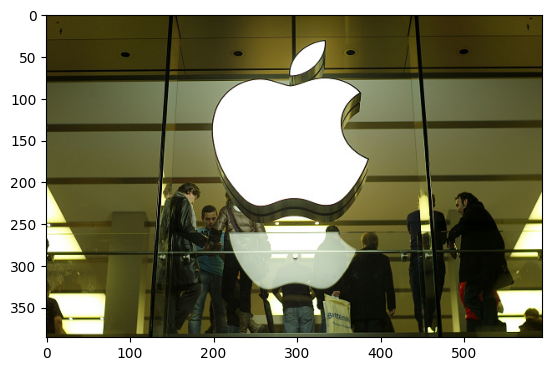

Image images/img12.jpeg score: 5


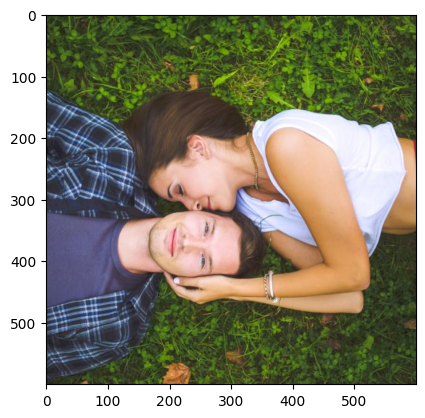

Image images/img15.jpeg score: 5


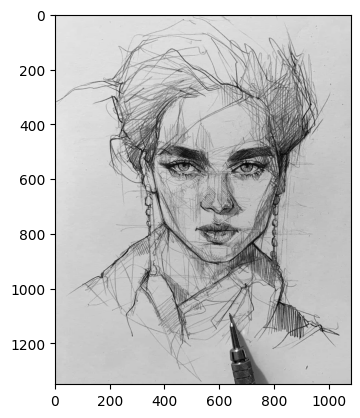

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = []
scores = [2, 1, 1, 4, 5, 4, 3, 5, 1, 4, 3, 4, 5, 2, 4, 5, 1, 1, 4, 2]

for i in range(20):  
    path = f'images/img{i}.jpeg'
    img = mpimg.imread(path)
    images.append((scores[i], img, path))

images.sort(key=lambda p: p[0])
for score, img, path in images:  
    print(f'Image {path} score: {score}')
    plt.imshow(img)
    plt.show()

In [3]:
!pip3 install torch

In [4]:
# !git clone https://github.com/aigagror/ML-Aesthetics-NIMA.git
# ! cp -r ML-Aesthetics-NIMA/* .

In [5]:
import torch
import piq
import pandas as pd
from main import rate
import os

def calc_merics(image):
    score, img, path = image
    t = torch.tensor(img).permute(2, 0, 1)[None, ...] / 255. 
    tv_index = piq.total_variation(t)
    brisque_index = piq.brisque(t, data_range=1., reduction='none')
    scores, mean, std = rate(path)
 
    return pd.Series({
        "PATH": path,
        "SCORE": score,
        "TV": tv_index.item(),
        "BRISQUE":brisque_index.item(),
        "NIMA": mean,
    })

In [6]:
import warnings

with warnings.catch_warnings(record=True):
    df = pd.DataFrame([calc_merics(image) for image in images])

In [7]:
df

PATH  SCORE          TV    BRISQUE      NIMA
0    images/img1.jpeg      1   42.841831  28.218323  5.418245
1    images/img2.jpeg      1   51.183460  15.331909  5.414028
2    images/img8.jpeg      1   60.380939   7.912903  5.422698
3   images/img16.jpeg      1   26.100473   4.398010  5.413891
4   images/img17.jpeg      1   32.419407  27.604919  5.406829
5    images/img0.jpeg      2   30.702711  35.613098  5.400420
6   images/img13.jpeg      2   76.493607  10.768494  5.405747
7   images/img19.jpeg      2   51.770840  26.511902  5.426469
8    images/img6.jpeg      3   69.743141   9.225769  5.417492
9   images/img10.jpeg      3   73.649376  68.486389  5.433897
10   images/img3.jpeg      4   48.124596  18.987488  5.412527
11   images/img5.jpeg      4   42.819042  35.330505  5.414540
12   images/img9.jpeg      4   55.257401  51.061584  5.415318
13  images/img11.jpeg      4   36.682373  25.789490  5.436718
14  images/img14.jpeg      4  144.990250  16.522888  5.391262
15  images/img18.jpeg      4   71.219193  16.046143  5.415775
16   images/img4.jpeg      5  305.031647  25.575745  5.425556
17   images/img7.jpeg      5   82.337959  33.000183  5.405221
18  images/img12.jpeg      5   65.901482  18.244263  5.417988
19  images/img15.jpeg      5  207.647110  30.571655  5.415961

In [8]:
df.corr()

/var/folders/4s/hl9y6lqs3h1c9qxxnbjmtvsr0000gn/T/ipykernel_38206/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


SCORE        TV   BRISQUE      NIMA
SCORE    1.000000  0.533317  0.255106  0.051190
TV       0.533317  1.000000  0.023850  0.038399
BRISQUE  0.255106  0.023850  1.000000  0.260191
NIMA     0.051190  0.038399  0.260191  1.000000

### Results
`SCORE` is human (mine) determined quality of photo. It correltes best with `TV` and worst with `NIMA`.